In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-games/players.csv
/kaggle/input/nba-games/teams.csv
/kaggle/input/nba-games/ranking.csv
/kaggle/input/nba-games/games_details.csv
/kaggle/input/nba-games/games.csv


## Initial analysis of relevant data

Before we begin to code our ML model we must first look into what data is not only relevant to what it is we are trying to accomplish but if the data is related to the desired outcome. In this particular case we can define our desired outcome as;

    -Predict the outcome of NBA games

Though vague it is important to have an understanding of the ultimate goal. With that in mind we must determine what is considered relevant to being able to make these predictions. For the purposes of this analysis we will look at what data appears to relate to winning a game to have a more concrete idea of what features to include in the model.

First we will load the data into a pandas dataframes and take a look at the data, more specifically we will first look into the games.csv for our initial dive into the data. This is because the games.csv has final game data and we can begin with simple probing into the data itself. Later we will look into as much of the data as we can.

In [2]:
gameData = pd.read_csv("/kaggle/input/nba-games/games_details.csv")
games = pd.read_csv("/kaggle/input/nba-games/games.csv")
players = pd.read_csv("/kaggle/input/nba-games/players.csv")
teams = pd.read_csv("/kaggle/input/nba-games/teams.csv")
rankings = pd.read_csv("/kaggle/input/nba-games/ranking.csv")
#initial dataframes for all .csv files
#For now the only dataframe we will look into is games
games.head()

/tmp/ipykernel_18/3956019479.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  gameData = pd.read_csv("/kaggle/input/nba-games/games_details.csv")


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


# Home Team advantage

Generally the team who is playing the home game is considered to have the advantage. We will do a small dive into this and see how true this claim is by looking at the data.

/tmp/ipykernel_18/934583140.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  home_wins = home_team_group.get_group(1)
/tmp/ipykernel_18/934583140.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  home_loses = home_team_group.get_group(0)


Home team win percentage: 58.70% 
Away team win percentage: 41.30%


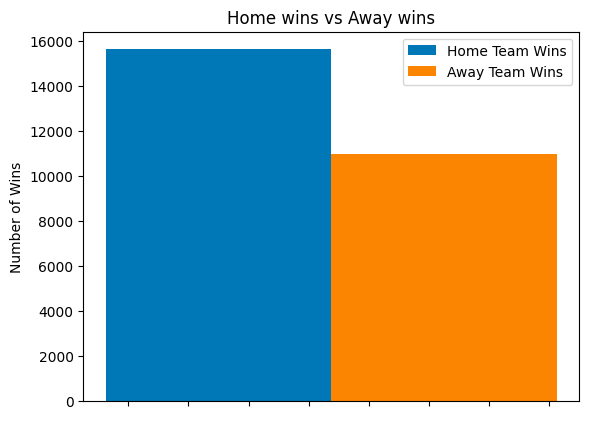

In [3]:
import matplotlib.pyplot as plt

home_team_group = games.groupby(["HOME_TEAM_WINS"])
home_wins = home_team_group.get_group(1)
home_loses = home_team_group.get_group(0)

home_team_wins = home_wins["HOME_TEAM_WINS"].value_counts()
away_team_wins = home_loses["HOME_TEAM_WINS"].value_counts()

plt.bar(0.5, home_team_wins, width = .75,color = '#0077b6',label = 'Home Team Wins')
plt.bar(1.25, away_team_wins, width = .75,color = '#fb8500',label = 'Away Team Wins')

plt.ylabel('Number of Wins')
plt.xticks(color = 'w')
plt.title('Home wins vs Away wins')
plt.legend()

percentage_for_home = games['HOME_TEAM_WINS'].value_counts()/len(games) * 100
print(f'Home team win percentage: {percentage_for_home[1]:.2f}% \nAway team win percentage: {percentage_for_home[0]:.2f}%')